# HALO UNIFIED dataset

The HALO UNIFEID dataset is a combination of [HAMP](https://amt.copernicus.org/articles/7/4539/2014/) radar and radiometer measurements, [BAHAMAS](http://www.halo.dlr.de/instrumentation/basis.html) aircraft position data and [dropsonde](https://github.com/Geet-George/JOANNE#joanne---the-eurec4a-dropsonde-dataset) measurements, all on a unified temporal and spatial grid. 

More information on the dataset can be found at `?`. If you have questions or if you would like to use the data for a publication, please don't hesitate to get in contact with the dataset authors as stated in the dataset attributes `contact` or `author`.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Get data
* To load the data we first load the EUREC4A meta data catalogue. More information on the catalog can be found [here](https://github.com/eurec4a/eurec4a-intake#eurec4a-intake-catalogue).

In [2]:
import eurec4a

In [3]:
cat = eurec4a.get_intake_catalog()
list(cat.HALO.UNIFIED)

['dropsondes', 'HAMPradar', 'HAMPradiometer', 'BAHAMAS']

* We can funrther specify the platform, instrument, if applicable dataset level or variable name, and pass it on to dask.

*Note: have a look at the attributes of the xarray dataset `ds` for all relevant information on the dataset, such as author, contact, or citation infromation.*

In [144]:
ds_radar = cat.HALO.UNIFIED.HAMPradar["HALO-0205"].to_dask()
ds_radiometer = cat.HALO.UNIFIED.HAMPradiometer["HALO-0205"].to_dask()

## Load HALO flight phase information
All HALO flights were split up into flight phases or segments to allow for a precise selection in time and space of a circle or calibration pattern. For more information have a look at the respective [github repository](https://github.com/eurec4a/halo-flight-phase-separation).

In [7]:
meta = eurec4a.get_flight_segments()

We select the flight phase we are interested in, e.g. the second circle on February 5 by it’s segment_id.

In [62]:
segments = {s["segment_id"]: {**s, "flight_id": flight["flight_id"]}
             for platform in meta.values()
             for flight in platform.values()
             for s in flight["segments"]
            }
seg = segments["HALO-0205_c2"]


We transfer the information from our flight segment selection to our radar and radiometer data in the xarray dataset.

In [71]:
ds_radar_selection = ds_radar.sel(time=slice(seg["start"], seg["end"]))
ds_radiometer_selection = ds_radiometer.sel(time=slice(seg["start"], seg["end"]))

## Plots

We plot reflectivity from the HAMP Radar and brightness temperatures from the low-frequency channels along the 22 GHz water vapor line (K band) from the HAMP radiometer.

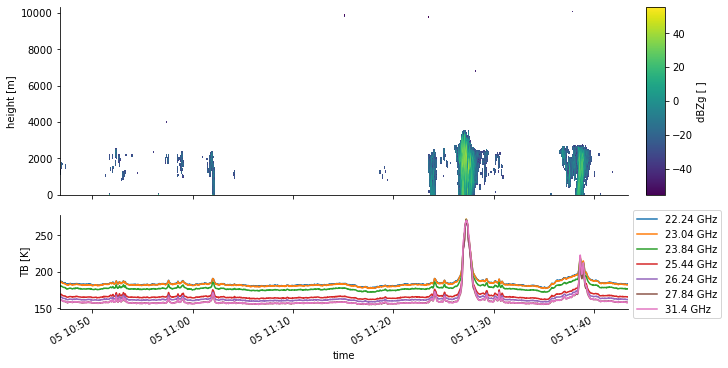

In [145]:
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(10,5), constrained_layout=True, gridspec_kw={'height_ratios':(2,1)})
## Radar dBZ
ds_radar_selection.dBZ.plot(ax= ax1, x='time', cmap ='viridis' )
## Radiometer TB from the low frequency channels along the 22 GHz water vapor line
for f in range (7): 
    data_radiometer = ds_radiometer_selection.tb.isel(frequency=f)
    data_radiometer.plot(ax= ax2, x='time', label = '{} GHz'.format(np.round(data_radiometer.frequency.item(),2)))
ax2.set_title('')
ax2.legend(bbox_to_anchor=(1,1.1))
ax1.set_xlabel('')
for ax in [ax1, ax2]:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
